In [9]:
import gym
import numpy as np
import time

env = gym.make('FrozenLake-v1')
STATES = env.observation_space.n
ACTIONS = env.action_space.n

Q = np.zeros((STATES, ACTIONS))

EPISODES = 1500 # how many times to run the enviornment from the beginning
MAX_STEPS = 100  # max number of steps allowed for each run of enviornment

LEARNING_RATE = 0.81  # learning rate
GAMMA = 0.96

RENDER = False # if you want to see training set to true

epsilon = 0.9


In [10]:
rewards = []
for episode in range(EPISODES):

  state = env.reset()
  for _ in range(MAX_STEPS):
    
    if RENDER:
      env.render()
    
    # Ensure state is an integer
    if isinstance(state, tuple):
        state = int(state[0])  # Extract first value if it's a tuple
    else:
        state = int(state)  # Otherwise, ensure it's an integer

    if np.random.uniform(0, 1) < epsilon:
      action = env.action_space.sample()  
    else:
      action = np.argmax(Q[state, :])

    # Debugging: Check variable types
    print(f"State: {state}, Type: {type(state)}")
    print(f"Action: {action}, Type: {type(action)}")
    
    # Ensure action is an integer
    action = int(action)
    
    # Perform action in the environment
    result = env.step(action)
    
    # Debugging: Check what env.step() returns
    print(f"env.step(action) returned: {result}")
    
    # Unpack correctly based on return values
    if len(result) == 5:
        next_state, reward, done, info, prob = result
    elif len(result) == 4:
        next_state, reward, done, info = result
        prob = None  # Assign None if not returned
    else:
        raise ValueError(f"Unexpected env.step() return format: {result}")
    
    # Ensure next_state is an integer
    if isinstance(next_state, tuple):
        next_state = int(next_state[0])
    else:
        next_state = int(next_state)
    
    # Q-learning update
    Q[state, action] = Q[state, action] + LEARNING_RATE * (
        reward + GAMMA * np.max(Q[next_state, :]) - Q[state, action]
    )
    
    
    state = next_state
    
    if done:
      rewards.append(reward)
      epsilon -= 0.001
      break


print(Q)
print(f"Average reward: {sum(rewards)/len(rewards)}:")
# and now we can see our Q values!

State: 0, Type: <class 'int'>
Action: 3, Type: <class 'int'>
env.step(action) returned: (0, 0.0, False, False, {'prob': 0.3333333333333333})
State: 0, Type: <class 'int'>
Action: 0, Type: <class 'int'>
env.step(action) returned: (0, 0.0, False, False, {'prob': 0.3333333333333333})
State: 0, Type: <class 'int'>
Action: 2, Type: <class 'int'>
env.step(action) returned: (1, 0.0, False, False, {'prob': 0.3333333333333333})
State: 1, Type: <class 'int'>
Action: 2, Type: <class 'int'>
env.step(action) returned: (1, 0.0, False, False, {'prob': 0.3333333333333333})
State: 1, Type: <class 'int'>
Action: 0, Type: <class 'numpy.int64'>
env.step(action) returned: (5, 0.0, True, False, {'prob': 0.3333333333333333})
State: 0, Type: <class 'int'>
Action: 2, Type: <class 'int'>
env.step(action) returned: (0, 0.0, False, False, {'prob': 0.3333333333333333})
State: 0, Type: <class 'int'>
Action: 2, Type: <class 'int'>
env.step(action) returned: (1, 0.0, False, False, {'prob': 0.3333333333333333})
State:

c:\Users\royav\AppData\Local\Programs\Python\Python312\Lib\site-packages\gym\utils\passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(terminated, (bool, np.bool8)):


env.step(action) returned: (1, 0.0, False, False, {'prob': 0.3333333333333333})
State: 1, Type: <class 'int'>
Action: 3, Type: <class 'int'>
env.step(action) returned: (2, 0.0, False, False, {'prob': 0.3333333333333333})
State: 2, Type: <class 'int'>
Action: 1, Type: <class 'numpy.int64'>
env.step(action) returned: (3, 0.0, False, False, {'prob': 0.3333333333333333})
State: 3, Type: <class 'int'>
Action: 3, Type: <class 'numpy.int64'>
env.step(action) returned: (3, 0.0, False, False, {'prob': 0.3333333333333333})
State: 3, Type: <class 'int'>
Action: 0, Type: <class 'int'>
env.step(action) returned: (2, 0.0, False, False, {'prob': 0.3333333333333333})
State: 2, Type: <class 'int'>
Action: 2, Type: <class 'int'>
env.step(action) returned: (6, 0.0, False, False, {'prob': 0.3333333333333333})
State: 6, Type: <class 'int'>
Action: 2, Type: <class 'numpy.int64'>
env.step(action) returned: (7, 0.0, True, False, {'prob': 0.3333333333333333})
State: 0, Type: <class 'int'>
Action: 1, Type: <cla

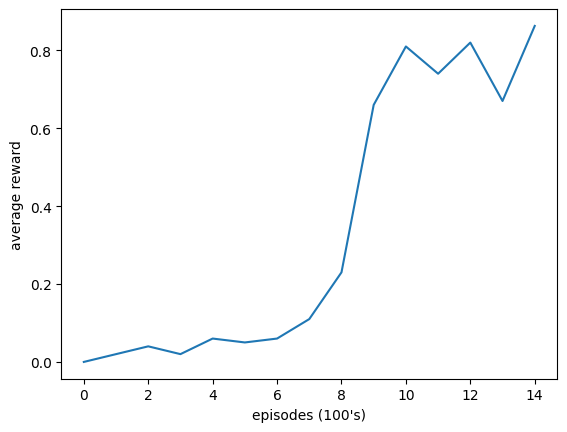

In [12]:
# we can plot the training progress and see how the agent improved
import matplotlib.pyplot as plt

def get_average(values):
  return sum(values)/len(values)

avg_rewards = []
for i in range(0, len(rewards), 100):
  avg_rewards.append(get_average(rewards[i:i+100])) 

plt.plot(avg_rewards)
plt.ylabel('average reward')
plt.xlabel('episodes (100\'s)')
plt.show()